In [1]:
%matplotlib inline  
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

In [2]:
from sklearn.decomposition import TruncatedSVD
from sklearn.random_projection import sparse_random_matrix
from sklearn.cluster import KMeans

In [3]:
df_climate = pd.read_csv("climate.csv", sep='\t')

In [4]:
df_climate['day'] = pd.to_datetime(df_climate['day'], infer_datetime_format=True)

In [5]:
df_climate['year'] = df_climate['day'].apply(lambda x: x.year).astype(str)
df_climate['month'] = df_climate['day'].apply(lambda x: x.month).astype(str)

In [6]:
df_climate['tday'] = df_climate['day'].apply(lambda x: x.timetuple().tm_yday).astype(str)

In [7]:
df_climate.head()

,pblk,day,ddays50,ddays50_97,ddays97,precip_intensity,precip_intensity_adj,meantemp,mintemp,mintemp_time,...,wind_bearing,pressure,cloud_cover,lat,long,region,region_consolidated,year,month,tday
0,100013,2011-01-24 00:00:00,0.42,0.42,0.00,0.0092,0.0092,44.19,38.24,2011-01-24 02:00:00,...,223,1021.41,0.62,2580.4751,-8409.4591,MADERA,FRES,2011,1,24
1,100013,2011-12-19 00:00:00,0.41,0.41,0.00,0.0000,0.0000,40.13,32.65,2011-12-19 04:00:00,...,95,1018.84,0.20,2580.4751,-8409.4591,MADERA,FRES,2011,12,353
2,100013,2003-09-13 01:00:00,29.66,25.66,0.09,0.0000,0.0000,79.66,64.10,2003-09-13 08:00:00,...,308,1008.79,0.02,2580.4751,-8409.4591,MADERA,FRES,2003,9,256
3,100013,1998-04-14 01:00:00,2.26,2.26,0.00,0.0000,0.0000,49.25,39.70,1998-04-14 08:00:00,...,301,1016.50,0.52,2580.4751,-8409.4591,MADERA,FRES,1998,4,104
4,100013,1999-01-29 00:00:00,0.81,0.81,0.00,0.0000,0.0000,42.13,30.46,1999-01-29 07:00:00,...,122,1023.78,0.10,2580.4751,-8409.4591,MADERA,FRES,1999,1,29


In [8]:
table = pd.pivot_table(df_climate, values='ddays50', index='pblk', columns='day')

In [9]:
table.head()

day,1995-01-01 00:00:00,1995-01-02 00:00:00,1995-01-03 00:00:00,1995-01-04 00:00:00,1995-01-05 00:00:00,1995-01-06 00:00:00,1995-01-07 00:00:00,1995-01-08 00:00:00,1995-01-09 00:00:00,1995-01-10 00:00:00,...,2015-12-23 00:00:00,2015-12-24 00:00:00,2015-12-25 00:00:00,2015-12-26 00:00:00,2015-12-27 00:00:00,2015-12-28 00:00:00,2015-12-29 00:00:00,2015-12-30 00:00:00,2015-12-31 00:00:00,2016-01-01 00:00:00
pblk,,,,,,,,,,,,,,,,,,,,,
100013,1.13,0.35,1.19,1.05,1.24,0.91,4.01,4.24,9.71,8.23,...,1.27,0.00,0.00,0.00,0.0,0.0,0.00,0.14,0.21,0.07
100015,0.00,0.00,1.43,0.01,1.92,0.37,4.16,4.78,10.13,6.83,...,1.35,0.23,0.02,0.14,0.0,0.0,0.00,0.00,0.00,0.00
100024,0.05,0.00,1.43,0.01,1.92,0.37,4.17,4.79,10.14,6.84,...,1.35,0.23,0.02,0.14,0.0,0.0,0.00,0.00,0.00,0.00
100055,1.19,0.61,1.11,1.34,0.78,0.88,4.41,4.14,9.56,7.94,...,1.00,0.00,0.00,0.00,0.0,0.0,0.00,0.02,0.14,0.15
100089,0.00,0.00,1.15,0.07,1.83,0.54,4.29,5.05,10.28,7.18,...,1.35,0.20,0.03,0.17,0.0,0.0,0.03,0.00,0.00,0.00


In [10]:
table_values = np.nan_to_num(table.values)
np.isfinite(table_values).all()

True

In [11]:
svd = TruncatedSVD(n_components=3, n_iter=7, random_state=42)
svd.fit(table_values)
ddays50 = svd.transform(table_values) 

In [12]:
ddays50

array([[  1.61135580e+03,  -1.22189902e+01,   6.34748442e-01],
       [  1.36771602e+03,   1.22080030e+01,  -1.04563385e+00],
       [  1.37083685e+03,   1.20685479e+01,  -1.05306863e+00],
       ..., 
       [  1.36892515e+03,   1.27579135e+01,  -4.14938411e-01],
       [  1.41811144e+03,   8.21797834e+00,  -1.28593394e+00],
       [  1.35574009e+03,   1.35472088e+01,  -8.53671949e-01]])

In [13]:
table = pd.pivot_table(df_climate, values='humidity', index='pblk', columns='day')
table_values = np.nan_to_num(table.values)
print(np.isfinite(table_values).all())

svd = TruncatedSVD(n_components=3, n_iter=7, random_state=42)
svd.fit(table_values)
humidity = svd.transform(table_values)
print(humidity.shape)
humidity

True
(803, 3)


array([[  4.81152092,  54.99117365,  -0.8157415 ],
       [  5.15489512,  58.22438559,   0.62956195],
       [  5.14806213,  58.14366285,   0.59591602],
       ..., 
       [  5.13868689,  58.15176811,   0.58085841],
       [  5.05420028,  57.18415744,   0.14800288],
       [  5.14756645,  58.12919255,   0.62313709]])

In [14]:
table = pd.pivot_table(df_climate, values='cloud_cover', index='pblk', columns='day')
table_values = np.nan_to_num(table.values)
print(np.isfinite(table_values).all())

svd = TruncatedSVD(n_components=3, n_iter=7, random_state=42)
svd.fit(table_values)
cloud_cover = svd.transform(table_values)
print(cloud_cover.shape)
cloud_cover

True
(803, 3)


array([[ 24.4611718 , -16.4476492 ,  26.60388836],
       [ 49.77577268, -13.55152171,  -9.71864012],
       [ 49.70908474, -13.49826019,  -9.69985993],
       ..., 
       [ 49.91814423, -13.64421384,  -9.71076151],
       [ 47.04246121, -11.62826176,  -9.3622863 ],
       [ 53.79022823, -17.20135156, -16.15789822]])

In [15]:
table = pd.pivot_table(df_climate, values='maxtemp', index='pblk', columns='day')
table_values = np.nan_to_num(table.values)
print(np.isfinite(table_values).all())

svd = TruncatedSVD(n_components=3, n_iter=7, random_state=42)
svd.fit(table_values)
maxtemp = svd.transform(table_values)
print(maxtemp.shape)
maxtemp

True
(803, 3)


array([[  6.88430414e+03,  -5.94625984e+00,  -1.55890440e+00],
       [  6.68523914e+03,   9.08531073e+00,   9.55798263e-02],
       [  6.68577046e+03,   8.45267109e+00,   4.51467023e-01],
       ..., 
       [  6.67638116e+03,   8.06754217e+00,   1.16175875e-01],
       [  6.70884734e+03,   6.36095574e+00,   2.57135687e-01],
       [  6.65107738e+03,   8.18527363e+00,   1.17741272e+00]])

In [16]:
# ddays50, humidity, cloud_cover, maxtemp
agg = np.append(ddays50, humidity, axis=1)
agg = np.append(agg, cloud_cover, axis=1)
#agg = np.append(agg, maxtemp, axis=1)

In [17]:
agg.shape

(803, 9)

In [28]:
kmeans = KMeans(n_clusters=5, random_state=5).fit(ddays50)

In [29]:
location=df_climate[['pblk','lat','long']].drop_duplicates()
location = location.sort_values('pblk')

In [30]:
location['cluster'] = kmeans.labels_.tolist()

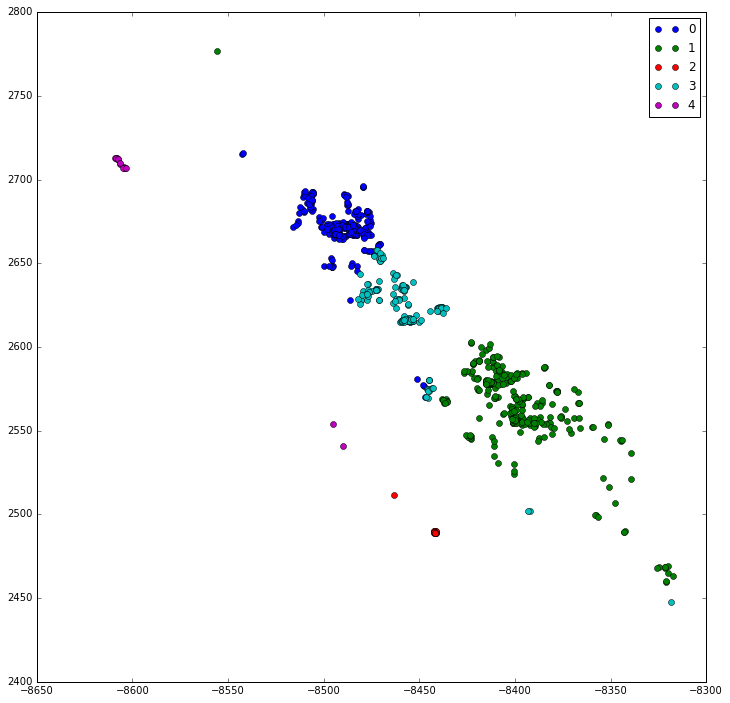

In [31]:
fig = plt.figure(figsize=(12,12))
for i in range(0,5):
    sub = location[location['cluster'] == i]
    plt.plot(sub['long'], sub['lat'], 'o', label=i)
plt.legend()


In [26]:
low_rank_ddays50 = pd.DataFrame(data=ddays50, columns=['ddays50_1', 'ddays50_2', 'ddays50_3'])

In [27]:
print(low_rank_ddays50.shape)
low_rank_ddays50

(803, 3)


,ddays50_1,ddays50_2,ddays50_3
0,1611.355802,-12.218990,0.634748
1,1367.716021,12.208003,-1.045634
2,1370.836849,12.068548,-1.053069
3,1727.012415,-16.562810,0.041056
4,1346.071443,14.417660,-0.434827
5,1347.532416,14.346182,-0.442129
6,1345.643804,14.476547,-0.439260
7,1339.366501,14.808311,-0.880299
8,1322.969043,15.457488,-0.498630
9,1378.281617,11.456107,-0.959384


In [37]:
low_rank_humidity = pd.DataFrame(data=humidity, columns=['humidity_1', 'humidity_2', 'humidity_3'])
low_rank_cloud_cover = pd.DataFrame(data=cloud_cover, columns=['cloud_cover_1', 'cloud_cover_2', 'cloud_cover_3'])
low_rank_maxtemp = pd.DataFrame(data=maxtemp, columns=['maxtemp_1', 'maxtemp_2', 'maxtemp_3'])

low_rank_humidity['pblk'] = location['pblk'].tolist()
low_rank_cloud_cover['pblk'] = location['pblk'].tolist()
low_rank_maxtemp['pblk'] = location['pblk'].tolist()
low_rank_ddays50['pblk'] = location['pblk'].tolist()

low_rank_ddays50.to_csv('lr_ddays50.csv', index=False)
low_rank_humidity.to_csv('lr_humidity.csv', index=False)
low_rank_cloud_cover.to_csv('lr_cloud_cover.csv', index=False)
low_rank_maxtemp.to_csv('lr_maxtemp.csv', index=False)